# Example: Compute the Payoff, Profit, and Breakeven Points for Composite Option Contracts at Expiration

## Background
Call and put contracts can be combined to develop composite contract structures with interesting payoff diagrams. Let's limit our focus to contracts that have the same underlying asset and the same expiration date. A composite option contract be composed of $d$ legs (individual contracts) in the contract set $\mathcal{C}$ where each leg $i\in\mathcal{C}$ is written with respect to the same underlying stock `XYZ` and has the same expiration date. Then, the overall payoff of the composite contract $\hat{V}(S(T),K_{1},\dots,K_{d})$ is given by:


$$\hat{V}(S(T),K_{1},\dots,K_{d}) = \sum_{i\in\mathcal{C}}\theta_{i}n_{i}V_{i}(S(T),K_{i})$$


where $K_{i}$ denotes the strike price of contract $i\in\mathcal{C}$. The overall profit of the composite contract $\hat{P}$ is given by:


$$\hat{P}(S(T),K_{1},\dots,K_{d}) = \sum_{i\in\mathcal{C}}\theta_{i}n_{i}P_{i}(S(T),K_{i})$$


where $\theta_{i}$ denotes the direction of contract $i$: if contract $i$ is short (sold), then $\theta_{i}=-1$, otherwise $\theta_{i}=1$, $n_{i}$ denotes the copy number of contract $i$, ${V}_{i}(S(T),K_{i})$ denotes the payoff of contract $i$, and $P_{i}(S(T),K_{i})$ denotes the profit of contract $i$. Finally, the profit for contract of type $\star$ is given by:

$$P_{\star}(K,S(T)) = {V}_{\star}(K,S(T)) -  \mathcal{P}_{\star}(K,S(0))$$

where $\mathcal{P}_{\star}(K,S(0))$ denotes the premium of contract $\star$, and ${V}_{\star}(K,S(T))$ denotes the payoff of contract $\star$ at expiration.

## Learning Objectives
For this example, we will compute the profit diagrams at expiration for some common composite contracts. We downloaded the options chain (premium value versus as a function of strike price) for [Advanced Micro Devices (AMD)](https://en.wikipedia.org/wiki/AMD) from [barchart.com](https://www.barchart.com). Currently, the share price of `AMD` is `S(0) = 117.50 USD/share`, and the average implied volatility for `AMD` options with `DTE = 31 days` is `IV = 51.75%`.

* __Objective 1__:  Examine vertical spreads, which are defined risk trades that make bullish or bearish directional assumptions and can be opened for a credit or debit.
* __Objective 2__: Explore long and short straddles, which are neutral trades that profit from share price movement in either direction.
* __Objective 3__: Analyze long and short strangles, which are another type of neutral trade that benefits from share price movement in any direction or no price movement at all.

## Setup
Fill me in

In [1]:
include("Include.jl");

## Prerequisite: Load options chain dataset
To start, load the options data using using the `loadoptionsdata(...)` function and store the data in the `options_dataset` variable:

In [2]:
options_dataset = loadoptionsdata()

Row,Strike,Bid,Midpoint,Ask,Last,AVGIV,IV,Type
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,String7
1,35,82.45,83.03,83.6,79.5,0.5175,2.3033,Call
2,40,77.5,77.95,78.4,48.5,0.5175,1.8801,Call
3,45,72.85,73.15,73.45,69.9,0.5175,1.2223,Call
4,50,67.85,68.13,68.4,71.0,0.5175,1.4811,Call
5,55,62.85,63.18,63.5,61.08,0.5175,0.8203,Call
6,60,57.9,58.18,58.45,57.1,0.5175,1.1983,Call
7,65,52.95,53.25,53.55,52.66,0.5175,0.8171,Call
8,70,47.9,48.25,48.6,46.79,0.5175,0.6489,Call
9,75,43.05,43.33,43.6,43.01,0.5175,0.6885,Call


## Objective 1: Profit and loss diagrams for Vertical Spreads
[Vertical spreads](https://www.fidelity.com/bin-public/060_www_fidelity_com/documents/learning-center/Deck_Vertical-spreads.pdf), a defined risk directional strategy, involve buying and selling the same type of option with different strike prices and the same expiration date. This creates two legs, a long leg (the option purchased by the investor) and a short leg (the option sold by the investor).  The investor can use the strategy to take a position on whether the share price of the underlying stock, such as `XYZ`, will increase or decrease. 

### Put vertical spreads
A put vertical spread is constructed from $2~\times$ `put` contracts. Let contract $j$ have a strike price of $K_{j}$ and premium $\mathcal{P}_{j}$. The share price at expiration is given by $S(T)$. Finally, let contract 1 be the short leg $\theta_{1} = -1$ and contract 2 be the long leg $\theta_{2} = 1$. Then, the profit for a single `put` vertical spread at expiration is given by:

$$\hat{P} = -P_{1}+P_{2}$$

which, after substitution of the profit functions for a put contract, gives:

$$
\hat{P} = \left(K_{2} - S\right)^{+} - \left(K_{1} - S\right)^{+} + \left(\mathcal{P}_{1} - \mathcal{P}_{2}\right)$$

where $V_{p} = (K-S)^{+}=\max(K-S,0)$ is the payoff function for a `put` contract. The first term is the net payout of the two legs of the spread, while the second term is the net cost of the two contracts. The maximum possible profit, loss, and breakeven conditions are given by:

* The maximum possible profit of $\left(\mathcal{P}_{1} - \mathcal{P}_{2}\right)$ will occur when $S\geq{K_{1}}$.
* The maximum possible loss of $K_{2} - K_{1} + \left(\mathcal{P}_{1} - \mathcal{P}_{2}\right)$ will occur when $S\leq{K_{2}}$.
* The vertical put spread will breakeven when $S =  K_{1}+\left(\mathcal{P}_{2} - \mathcal{P}_{1}\right)$.

## Objective 2: Profit and loss diagrams for long and short straddles
A [straddle](https://www.investopedia.com/terms/s/straddle.asp) is a _neutral strategy_ constructed by simultaneously buying (or selling) a put and a call option on the same underlying asset `XYZ`, with the _same expiration_, and the _same strike price_. Depending upon the choice of the strike prices and whether an investor buys or sells both legs, a [straddle](https://www.investopedia.com/terms/s/straddle.asp) can be initiated as a credit or debit and can potentially have undefined profit or loss.

Let $K_{j}$ denote the strike price of contract $j$ (USD/share), where the price of contract $j$ is $\mathcal{P}_{j}$ (USD/share). Finally, let index $j=1$ denote the `put` contract, $j=2$ denote the `call` contract; for a straddle $K_{1}= K_{2}\equiv{K}$ (both legs have the same strike). 

### Profit and loss for a straddle
The profit for a single straddle contract $\hat{P}$ at expiration is given by:

$$\hat{P} = \theta\cdot\left(P_{1}+P_{2}\right)$$

where $\theta_{1}=\theta_{2}\equiv\theta$ denotes a direction parameter: $\theta=-1$ if each leg is sold (short), $\theta=1$ otherwise. After substitution of the profit functions for a `put` and a `call` contract, the overall profit $\hat{P}$ is given by:

$$\hat{P} = \theta\cdot\Bigl[(K-S)^{+}+(S-K)^{+}-(\mathcal{P}_{1}+\mathcal{P}_{2})\Bigr]$$

where $V_{p} = (K-S)^{+}=\max(K-S,0)$ is the payoff function for the `put` contract, and $V_{c} = (S-K)^{+} = \max(S-K,0)$ is the payoff function for the `call` contract. The profit (or loss) of a straddle has three regimes given by:

$$
\hat{P} = \begin{cases}
  \theta\cdot\Bigl[(S-K)-\left(\mathcal{P}_{1}+\mathcal{P}_{2}\right)\Bigr]  & S>K \\
  -\theta\cdot\Bigl[\mathcal{P}_{1}+\mathcal{P}_{2}\Bigr] & S=K \\
    \theta\cdot\Bigl[(K-S)-\left(\mathcal{P}_{1}+\mathcal{P}_{2}\right)\Bigr] & S<K
\end{cases}
$$

Finally, a straddle has _two_ possible breakeven points denoted as $S^{+}$ and $S^{-}$:
* If $S>K$: a straddle will breakeven at $S^{+} = K + \left(\mathcal{P}_{1}+\mathcal{P}_{2}\right)$
* If $S<K$: a straddle will breakeven at $S^{-} = K - \left(\mathcal{P}_{1}+\mathcal{P}_{2}\right)$.

### Long straddle
For a long straddle, we purchase (are long) both the `put` and the `call` contracts in the straddle, thus $\theta = 1$. Let's contruct the profit diagram for a long straddle with the parameters:

* Leg 1: The strike price for the `put` leg is given by $K_{1}$ = 120 USD/share with `DTE = 31 days`
* Leg 2: The strike price for the `call` leg is given by $K_{2}$ = 120 USD/share with `DTE = 31 days`

In [3]:
K = 120.0
premium_1 = filter([:Strike,:Type] => (x,y) -> (x == K && y == "Put"), options_dataset)[1,:Ask];
premium_2 = filter([:Strike,:Type] => (x,y) -> (x == K && y == "Call"), options_dataset)[1,:Ask];

In [4]:
put_contract_model = build(MyAmericanPutContractModel, (
        K = K, premium = premium_1, sense = 1
));

call_contract_model = build(MyAmericanCallContractModel, (
        K = K, premium = premium_2, sense = 1
));

In [22]:
S = range(90,stop = 150, step=0.1) |> collect;
BEL = zeros(length(S))
profit_array = profit([put_contract_model, call_contract_model], S)

601×4 Matrix{Float64}:
  90.0  -22.1    6.35  -15.75
  90.1  -22.0    6.35  -15.65
  90.2  -21.9    6.35  -15.55
  90.3  -21.8    6.35  -15.45
  90.4  -21.7    6.35  -15.35
  90.5  -21.6    6.35  -15.25
  90.6  -21.5    6.35  -15.15
  90.7  -21.4    6.35  -15.05
  90.8  -21.3    6.35  -14.95
  90.9  -21.2    6.35  -14.85
  91.0  -21.1    6.35  -14.75
  91.1  -21.0    6.35  -14.65
  91.2  -20.9    6.35  -14.55
   ⋮                   
 148.9    7.9  -22.55  -14.65
 149.0    7.9  -22.65  -14.75
 149.1    7.9  -22.75  -14.85
 149.2    7.9  -22.85  -14.95
 149.3    7.9  -22.95  -15.05
 149.4    7.9  -23.05  -15.15
 149.5    7.9  -23.15  -15.25
 149.6    7.9  -23.25  -15.35
 149.7    7.9  -23.35  -15.45
 149.8    7.9  -23.45  -15.55
 149.9    7.9  -23.55  -15.65
 150.0    7.9  -23.65  -15.75

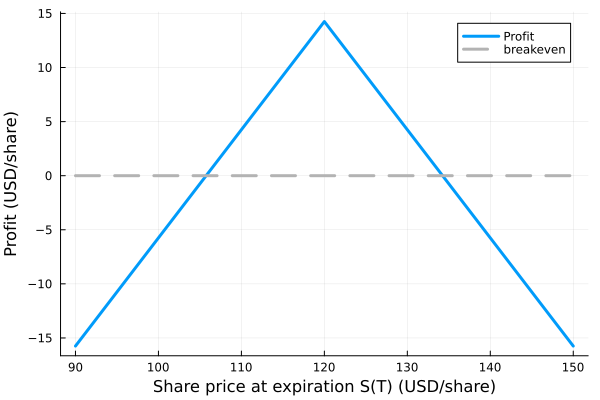

In [28]:
plot(profit_array[:,1], profit_array[:,4], lw=3, label="Profit")
plot!(S,BEL,lw=3, c=:gray70, ls=:dash, label="breakeven")
xlabel!("Share price at expiration S(T) (USD/share)", fontsize=18)
ylabel!("Profit (USD/share)", fontsize=18)

### Short straddle
For a short straddle, we sell (are short) both the `put` and the `call` contracts in the straddle, thus $\theta = 1$. Let's contruct the profit diagram for a long straddle with the parameters:

* Leg 1: The strike price for the `put` leg is given by $K_{1}$ = 120 USD/share with `DTE = 31 days`
* Leg 2: The strike price for the `call` leg is given by $K_{2}$ = 120 USD/share with `DTE = 31 days`

In [17]:
put_contract_model = build(MyAmericanPutContractModel, (
        K = K, premium = premium_1, sense = -1
));

call_contract_model = build(MyAmericanCallContractModel, (
        K = K, premium = premium_2, sense = -1
));

In [18]:
S = range(90,stop = 150, step=0.1) |> collect;
BEL = zeros(length(S))
profit_array = profit([put_contract_model, call_contract_model], S)

601×4 Matrix{Float64}:
  90.0  -22.1    6.35  -15.75
  90.1  -22.0    6.35  -15.65
  90.2  -21.9    6.35  -15.55
  90.3  -21.8    6.35  -15.45
  90.4  -21.7    6.35  -15.35
  90.5  -21.6    6.35  -15.25
  90.6  -21.5    6.35  -15.15
  90.7  -21.4    6.35  -15.05
  90.8  -21.3    6.35  -14.95
  90.9  -21.2    6.35  -14.85
  91.0  -21.1    6.35  -14.75
  91.1  -21.0    6.35  -14.65
  91.2  -20.9    6.35  -14.55
   ⋮                   
 148.9    7.9  -22.55  -14.65
 149.0    7.9  -22.65  -14.75
 149.1    7.9  -22.75  -14.85
 149.2    7.9  -22.85  -14.95
 149.3    7.9  -22.95  -15.05
 149.4    7.9  -23.05  -15.15
 149.5    7.9  -23.15  -15.25
 149.6    7.9  -23.25  -15.35
 149.7    7.9  -23.35  -15.45
 149.8    7.9  -23.45  -15.55
 149.9    7.9  -23.55  -15.65
 150.0    7.9  -23.65  -15.75

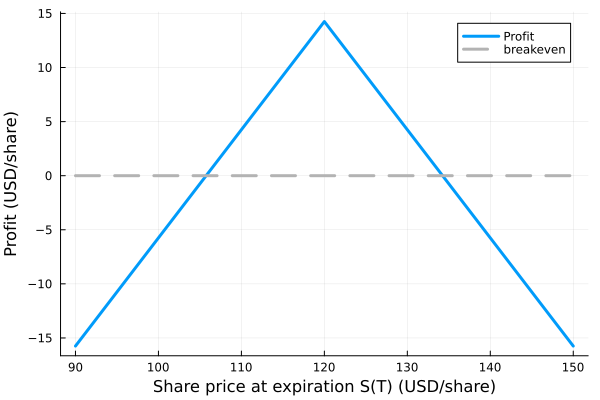

In [27]:
plot(profit_array[:,1], profit_array[:,4], lw=3, label="Profit")
plot!(S,BEL,lw=3, c=:gray70, ls=:dash, label="breakeven")
xlabel!("Share price at expiration S(T) (USD/share)", fontsize=18)
ylabel!("Profit (USD/share)", fontsize=18)

## Objective 3: Profit and loss diagrams for long and short strangles
A [strangle](https://www.investopedia.com/terms/s/strangle.asp) position is a _neutral strategy_ constructed by simultaneously buying or selling a put and a call option on the same underlying asset `XYZ`, with the _same expiration_ but with _different strike prices_. Depending upon the choice of the strike prices and whether an investor buys or sells both legs, a [strangle](https://www.investopedia.com/terms/s/strangle.asp) can be initiated as a credit or debit and can potentially have undefined profit or loss.

Let $K_{j}$ denote the strike price of contract $j$ (USD/share), where the price of contract $j$ is $\mathcal{P}_{j}$ (USD/share). Finally, let index $j=1$ denote the `put` contract, $j=2$ denote the `call` contract; for a strangle $K_{1}<K_{2}$. 

### Profit and loss for a strangle
The profit for a single strangle contract $\hat{P}$ at expiration is given by:

$$\hat{P} = \theta\cdot\left(P_{1}+P_{2}\right)$$

where $\theta_{1}=\theta_{2}\equiv\theta$ denotes a direction parameter: $\theta=-1$ if each leg is sold (short), $\theta=1$ otherwise. After substitution of the profit functions for a `put` and a `call` contract, the overall profit $\hat{P}$ is given by:

$$\hat{P} = \theta\cdot\Bigl[(K_{1}-S)^{+}+(S-K_{2})^{+}-(\mathcal{P}_{1}+\mathcal{P}_{2})\Bigr]$$

where $V_{p} = (K_{1}-S)^{+}=\max(K_{1}-S,0)$ is the `payoff` for the `put` contract, and $V_{c} = (S-K_{2})^{+} = \max(S-K_{2},0)$ is the `payoff` for the `call` contract. The profit (or loss) of a strangle has three regimes given by:

$$
\hat{P} = \begin{cases}
  \theta\cdot\Bigl[(S-K_{2})-\left(\mathcal{P}_{1}+\mathcal{P}_{2}\right)\Bigr]  & S>K_{2} \\
  -\theta\cdot\Bigl[\mathcal{P}_{1}+\mathcal{P}_{2}\Bigr] & K_{1}\leq{S}\leq{K_{2}} \\
  \theta\cdot\Bigl[(K_{1}-S)-\left(\mathcal{P}_{1}+\mathcal{P}_{2}\right)\Bigr] & S<{K_{1}}
\end{cases}
$$

A [strangle](https://www.investopedia.com/terms/s/strangle.asp) has two break-even points $S^{+}$ and $S^{-}$ where $K_{2}<S^{+}$ and $S^{-}<K_{1}$. The low break-even point $S^{-}$ is given by:

$$S^{-} = K_{1} - \left(\mathcal{P}_{1}+\mathcal{P}_{2}\right)$$

while the high break-even point $S^{+}$ is given by:

$$S^{+} = K_{2} + \left(\mathcal{P}_{1}+\mathcal{P}_{2}\right)$$

### Long strangle
For a long strangle, we purchase (are long) both the `put` and the `call` contracts in the straddle, thus $\theta = 1$. Let's contruct the profit diagram for a long straddle with the parameters:

* Leg 1: The strike price for the `put` leg is given by $K_{1}$ = 105 USD/share with `DTE = 31 days`
* Leg 2: The strike price for the `call` leg is given by $K_{2}$ = 135 USD/share with `DTE = 31 days`

In [7]:
# impl goes here

### Short strangle
For a short strangle, we sell (are short) both the `put` and the `call` contracts in the straddle, thus $\theta = 1$. Let's contruct the profit diagram for a long straddle with the parameters:

* Leg 1: The strike price for the `put` leg is given by $K_{1}$ = 105 USD/share with `DTE = 31 days`
* Leg 2: The strike price for the `call` leg is given by $K_{2}$ = 135 USD/share with `DTE = 31 days`

In [8]:
# impl goes here